<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/CollaborativeFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommender System using explicit preferences (Ratings data)



In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
electronics=pd.read_csv('ratings_Electronics.csv',names=['user','item','rating','timestamp'],header=None)

In [4]:
electronics.head()

,user,item,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [27]:
electronics.drop('timestamp',axis=1,inplace=True)

In [28]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51778 entries, 0 to 51777
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    51778 non-null  object 
 1   item    51778 non-null  object 
 2   rating  51777 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [29]:
df=pd.DataFrame(electronics.groupby('user')['rating'].count())

In [30]:
electronics.describe()

,rating
count,51777.000000
mean,4.036503
std,1.354294
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [31]:
electronics['item'].nunique()

3615

In [32]:
electronics['user'].nunique()

48098

In [33]:
df.tail()

,rating
user,
AZZP8BC9WE0N8,1
AZZR8DUVE5L8O,1
AZZST8OYL5P4Q,1
AZZUBI2MEAHI9,1
AZZZEWADNFNUM,1


In [36]:
users_above_five=df.loc[df['rating']>5,:].index

In [38]:
electronics=electronics[electronics['user'].isin(users_above_five)]

In [40]:
electronics.describe()

,rating
count,889.000000
mean,4.202475
std,1.081975
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [41]:
#Shape of the data
electronics.shape

(889, 3)

In [42]:
electronics.isna().sum().sort_values()

user      0
item      0
rating    0
dtype: int64

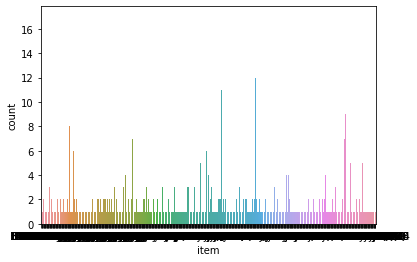

In [43]:
#Visualize item popularity
sns.countplot(x='item',data=electronics)

In [45]:
# Find top 10 items with the highest average rating
item_average=pd.DataFrame(electronics.groupby('item')['rating'].mean())

In [51]:
item_average['rating'].sort_values(ascending=False)[:10]

item
B00001WROM    5.0
B00003CWDQ    5.0
B00000K2OZ    5.0
B00004THDE    5.0
B00003G1RE    5.0
B00003G1RC    5.0
B00003G1R9    5.0
B00000K3RE    5.0
B00003CYN8    5.0
B00003CWFU    5.0
Name: rating, dtype: float64

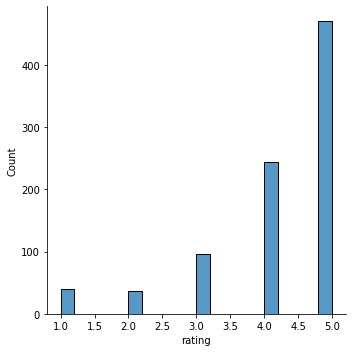

In [57]:
sns.displot(data=electronics,x='rating')

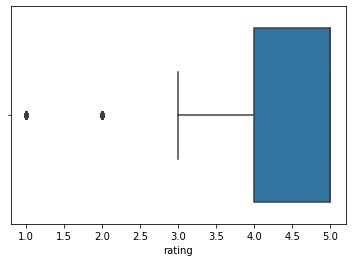

In [58]:
sns.boxplot(data=electronics,x='rating')

In [60]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 6.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633739 sha256=ab4d6a86ba1d3d75070eb36d353f9c98616fab32b6b7d7a7bf58268983e8b0f4
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [61]:
from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans

In [62]:
reader = Reader()
surprise_data = Dataset.load_from_df(electronics, reader)

In [71]:
#Item based collaborative filtering
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(surprise_data, test_size=.3, random_state=10)
sim={'name': 'Cosine','user_based':True}
algo=KNNWithMeans(sim_options=sim)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [75]:
for i in range(len(testset)):
  p=algo.predict(testset[0][0],testset[i][1])
  print(p.est)

5
5
4.265273311897106
4.380434782608695
5
5
5
4.265273311897106
4.265273311897106
5
4.265273311897106
5
5
5
5
4.265273311897106
4.265273311897106
4.265273311897106
4.265273311897106
4.380434782608695
5
5
5
5
5
4.265273311897106
5
5
4.265273311897106
4.8647342995169085
4.265273311897106
4.265273311897106
4.265273311897106
4.265273311897106
4.265273311897106
5
5
4.265273311897106
4.265273311897106
4.265273311897106
4.265273311897106
5
4.265273311897106
5
4.265273311897106
5
4.797101449275362
5
5
4.380434782608695
4.265273311897106
5
5
4.265273311897106
5
5
5
5
4.265273311897106
4.265273311897106
4.265273311897106
4.265273311897106
5
5
5
4.265273311897106
4.265273311897106
4.265273311897106
5
5
4.265273311897106
5
4.265273311897106
5
5
4.265273311897106
4.265273311897106
5
4.265273311897106
5
5
4.265273311897106
4.265273311897106
5
4.265273311897106
4.265273311897106
4.265273311897106
5
4.265273311897106
5
5
4.265273311897106
4.265273311897106
5
4.265273311897106
5
5
4.265273311897106
4.2

In [73]:
testset

[('A3XNTYRDE0MFI', 'B00000JDGQ', 5.0),
 ('ATW2I5S6S2PFA', 'B00000JX2V', 5.0),
 ('A2HDTOF8222KN3', 'B000001OKH', 5.0),
 ('A1RPTVW5VEOSI', 'B00004RC2D', 5.0),
 ('A14PTJ17T1GTCE', 'B00004S9AK', 5.0),
 ('ARXU3FESTWMJJ', 'B00000JBAT', 2.0),
 ('A3O4F0C47C2FEY', 'B000031KIM', 3.0),
 ('A3D6KFKN4J5ULE', 'B00000JFHW', 1.0),
 ('AUCF61BNJ5ZX7', 'B00004T2LK', 5.0),
 ('AP6X4IJR5H92P', 'B00004TDN0', 5.0),
 ('AJJV9Z17KV6GR', 'B0000228GG', 5.0),
 ('A80HSYQYS2JX0', 'B00001P4ZH', 5.0),
 ('A23ZO1BVFFLGHO', 'B00002SWHH', 5.0),
 ('AK94AGPA2L5GY', 'B00004SCKA', 5.0),
 ('A231WM2Z2JL0U3', 'B0000488VK', 3.0),
 ('A23ZO1BVFFLGHO', 'B00001ZT58', 5.0),
 ('A243HY69GIAHFI', 'B00004SPUN', 4.0),
 ('AUCF61BNJ5ZX7', 'B00004TDWV', 5.0),
 ('A1JSO7PPEA0W72', 'B00000J4LQ', 4.0),
 ('A3IBOQ8R44YG9L', 'B00004RC2D', 5.0),
 ('A3O4F0C47C2FEY', 'B00004SPC0', 2.0),
 ('A8HZL68EGLI18', 'B00004TL5Q', 4.0),
 ('A6FIAB28IS79', 'B00001P4ZH', 3.0),
 ('A243HY69GIAHFI', 'B00002JXFH', 2.0),
 ('A3MV1KKHX51FYT', 'B00001TZYI', 5.0),
 ('A2B7BUH883